# Introduction
#### The dataset is a collection of data on breast cancer patients. It contains information on patient demographics, tumor characteristics, and survival outcomes for 285 patients who were diagnosed with breast cancer and underwent surgery between 1985 and 1995.

#### Each record in the dataset represents a single patient and includes information such as the patient's age at diagnosis, menopausal status, tumor size, tumor grade, lymph node status, and whether the patient survived or died during the follow-up period.

#### This dataset can be used for various analyses and modeling tasks such as predicting patient survival outcomes based on their tumor characteristics and demographic information, understanding the factors that contribute to patient survival, and identifying the most important features that influence patient outcomes.

#### It is worth noting that this dataset is relatively small, with only 285 records, and may require careful consideration of overfitting and model generalization when building predictive models. Additionally, it is important to consider the limitations of the dataset, such as the fact that it only includes data from a single institution and may not be representative of breast cancer patients more broadly.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from scipy.stats import reciprocal, uniform, stats
from sklearn.metrics import classification_report

#### Download the dataset

In [2]:
can_df=pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')
can_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Discover and Visualize the Data to gain insights

In [3]:
#getting information about consistency of data 

can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# count the number of missing values in for each column.

can_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# drop duplicated rows

can_df.drop_duplicates().head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Dropping columns that are not needed

can_df = can_df.drop(['id', 'Unnamed: 32'], axis=1)
can_df = can_df.reset_index(drop=True)


In [7]:
# generate descriptive statistics of a of each column.

can_df.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#getting names of columns

can_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

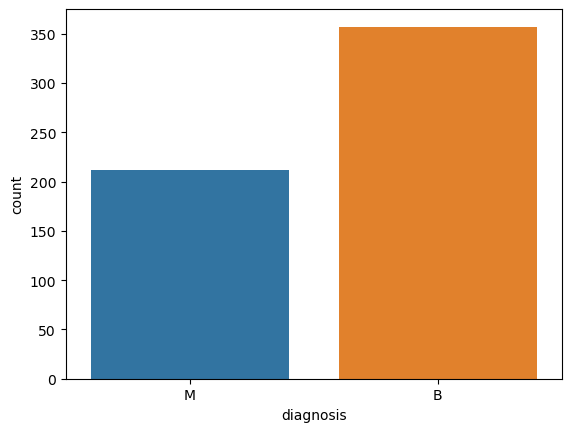

In [9]:
# Creating a bar chart to display the distribution of types of statuses

sns.countplot(x='diagnosis', data=can_df)

In [10]:
# get list of categorical columns

cat_cols = can_df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['diagnosis']

In [11]:
# performing label encoding on categorical columns 

le = LabelEncoder()

for col in cat_cols: 
    # Encode values in training set
    le.fit(can_df[col])
    can_df[col] = le.transform(can_df[col])
can_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Calculate the correlations between columns

<AxesSubplot:>

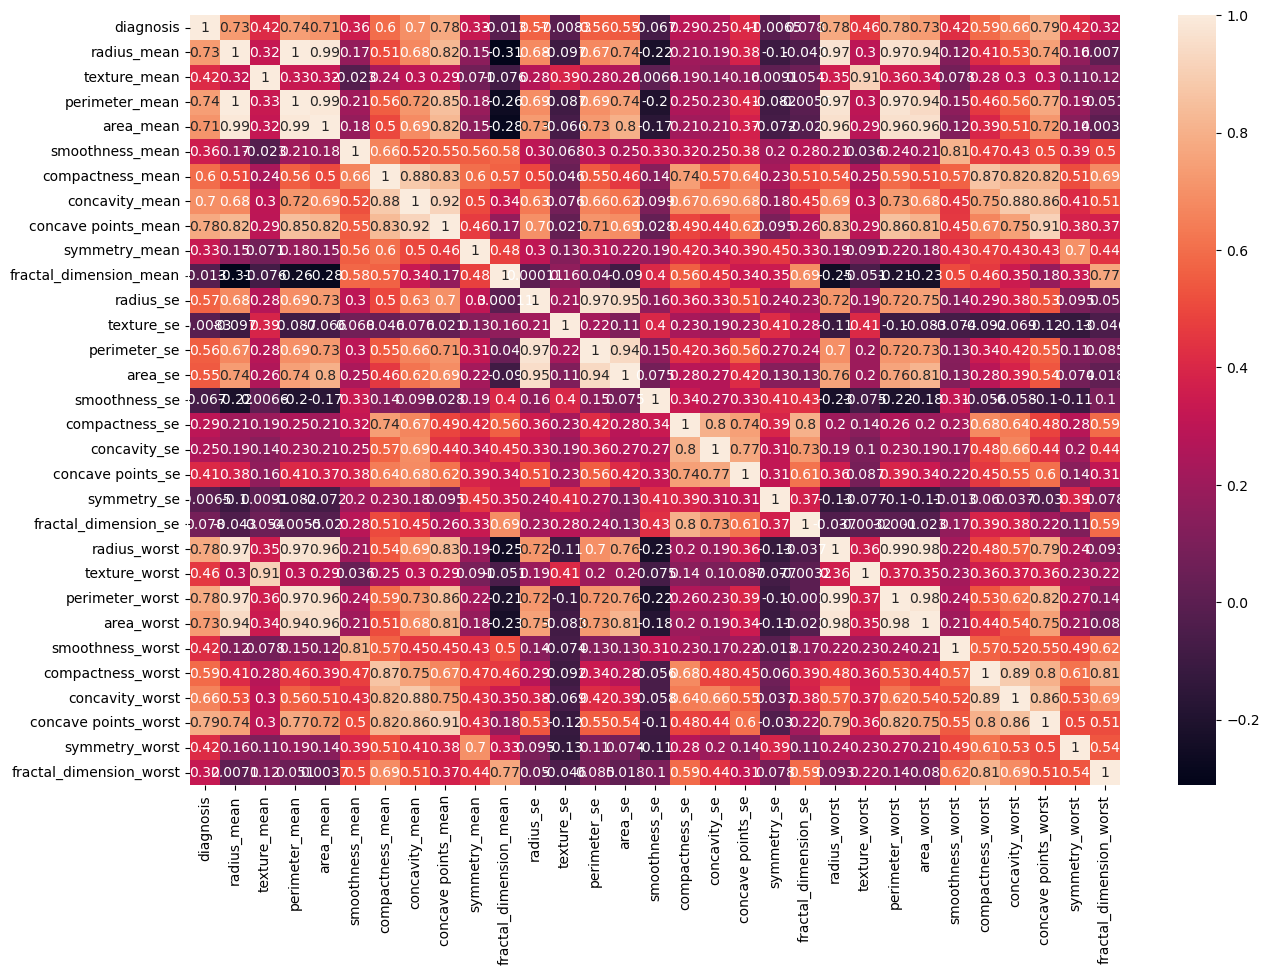

In [12]:
# compute the correlation between the columns of the DataFrame

plt.figure(figsize=(15,10))
sns.heatmap(can_df.corr(),annot=True)

In [13]:
corr_matrix = can_df.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [14]:
# sort the correlation values between the columns and the target column in descending order 

corr_matrix['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

#### Handling outliers

In [15]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(can_df)

,Outlier_percentage
area_se,11.423550
radius_se,6.678383
perimeter_se,6.678383
area_worst,6.151142
smoothness_se,5.272408
fractal_dimension_se,4.920914
compactness_se,4.920914
symmetry_se,4.745167
area_mean,4.393673
fractal_dimension_worst,4.217926


#### Splitting the dataset into training and test sets

In [16]:
X = can_df.drop("diagnosis",axis=1)
y = can_df["diagnosis"]

In [17]:
# First we will devide the dataset in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size= 0.3 , random_state=42)

#### StandardScaler

##### - To avoid the data leakage we fisrt split the dataset then create object and fit of train dataset and use that fit to transform the test dataset

In [18]:
# Create the object
Standard_scale = StandardScaler()
# fit on the train dataset
Standard_scale.fit((X_train))
# transform the train dataset columns ("Experience" and "Salary")
X_train = Standard_scale.transform(X_train)

In [19]:
X_train = pd.DataFrame(X_train,columns=[X])
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.497494,-1.073749,-1.379543,-1.160029,0.135881,0.973654,-0.025866,-0.523567,0.368583,3.748516,...,-1.367290,-1.636531,-1.355982,-1.048088,-0.481514,-0.036959,-0.638602,-1.034066,-1.010604,1.421056
394,-0.718174,-0.197010,-0.704330,-0.689902,1.326521,-0.031346,-0.223452,-0.360813,-0.007761,0.350328,...,-0.656559,0.624700,-0.661404,-0.631799,1.610316,0.113949,0.095984,0.124773,-0.123711,0.424820
395,0.032261,-0.555784,-0.080644,-0.075809,-2.303586,-1.496809,-1.039653,-1.120156,-1.099533,-1.229967,...,-0.287322,-0.807912,-0.391138,-0.346027,-2.004940,-1.338808,-1.173282,-1.261790,-0.682839,-1.276726
396,-0.055526,0.109492,-0.046842,-0.168160,0.730110,0.195463,0.315536,0.429860,-0.499617,0.383481,...,0.157015,0.880940,0.197816,-0.022013,1.284147,0.725664,0.706523,1.079240,0.475584,1.255302


In [20]:
# Create the object
Standard_scale = StandardScaler()
# fit on the test dataset
Standard_scale.fit((X_test))
# transform the test dataset columns 
X_test = Standard_scale.transform(X_test)

In [21]:
X_test = pd.DataFrame(X_test,columns=[X])
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.441809,-0.221639,-0.420045,-0.482548,0.160796,-0.016992,-0.124485,-0.286991,0.327691,0.094225,...,-0.256006,-0.223890,-0.315504,-0.352839,0.396158,-0.162669,-0.058250,-0.213360,0.118653,0.135392
1,1.409862,0.383034,1.328779,1.452397,-0.489952,-0.068514,0.208627,0.715347,-0.874240,-1.289050,...,1.758255,0.078415,1.692996,1.745945,-0.647669,-0.186625,-0.051437,0.895536,-0.645282,-0.988358
2,0.413909,-0.025288,0.427832,0.314598,0.810864,0.276148,0.668667,0.748354,0.348716,-0.780940,...,0.617723,-0.011965,0.514063,0.491727,0.933752,-0.153543,0.418666,0.501548,-0.173391,-0.244738
3,-0.461842,-0.426915,-0.404412,-0.524644,0.552198,0.441372,-0.155948,-0.535027,-0.071784,1.199935,...,-0.681669,-0.493471,-0.500683,-0.639190,0.503677,-0.019502,-0.172369,-0.611645,-0.637033,0.452081
4,-0.707968,-1.149845,-0.684981,-0.718407,0.173730,0.093157,-0.275606,-0.584779,-0.047255,0.714575,...,-0.807942,-0.996793,-0.812094,-0.741647,0.033283,-0.310969,-0.430414,-0.676402,-1.011575,-0.184936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.353089,-0.692436,-0.408526,-0.421045,0.069583,-0.966765,-0.643161,-0.519251,-0.846206,-0.997835,...,-0.563543,-0.984327,-0.613975,-0.570119,-0.186235,-1.116295,-0.753184,-0.824828,-0.922477,-1.081440
167,0.207850,1.300083,0.139859,0.074857,-0.989586,-0.614997,-0.589291,-0.479692,0.029837,-0.956882,...,0.057640,0.968188,0.010859,-0.090513,-1.243502,-0.734194,-0.509616,-0.098745,-0.363138,-0.797513
168,-1.176181,-0.342127,-1.098429,-1.018457,-0.020270,0.402287,0.479168,-0.312474,-0.569377,2.737918,...,-1.011609,-0.262847,-0.976282,-0.861063,-0.163835,0.163591,0.288791,-0.247744,-0.541334,1.627832
169,-0.055448,1.092576,0.042359,-0.142193,1.287354,1.089833,0.538759,0.426053,1.554152,1.404696,...,-0.044193,1.069476,-0.029397,-0.158347,2.044778,0.743101,0.244081,0.511577,1.169683,1.737035


In [22]:
#reshaping the data

X_train_arr = np.array(X_train)
Y_train_arr = np.array(Y_train)

X_test_arr = np.array(X_test)
Y_test_arr = np.array(Y_test)

### Train three different classifiers.

### RandomForestClassifier

In [23]:
rf_classifier=RandomForestClassifier()

In [24]:
#fit the model

rf_classifier.fit(X_train_arr, Y_train_arr)

RandomForestClassifier()

In [25]:
#make predictions on the test set

rf_pred= rf_classifier.predict(X_test_arr)
rf_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

- Evaluation

In [26]:
print(classification_report(Y_test_arr, rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [27]:
print("F-1 Score : ",round(f1_score(Y_test_arr,rf_pred)*100,2),'%')
print("Precision Score : ",round(precision_score(Y_test_arr,rf_pred)*100,2),'%')
print("Recall Score : ",round(recall_score(Y_test_arr,rf_pred)*100,2),'%')
print("Accuracy : ",round(accuracy_score(Y_test_arr,rf_pred)*100,2),'%')

F-1 Score :  95.93 %
Precision Score :  98.33 %
Recall Score :  93.65 %
Accuracy :  97.08 %


In [28]:
confusion_matrix(Y_test, rf_pred)

array([[107,   1],
       [  4,  59]])

### StochasticGradientDescentClassifier

In [29]:
sgd_classifier = SGDClassifier(max_iter= 1000, tol= 1e-3)

In [30]:
# fit the model

sgd_classifier.fit(X_train_arr, Y_train_arr)

SGDClassifier()

In [31]:
#make predictions on the test set
sgd_pred= sgd_classifier.predict(X_test_arr) 
sgd_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

- Evaluation

In [32]:
print(classification_report(Y_test_arr, sgd_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [33]:
print("F-1 Score : ",round(f1_score(Y_test_arr,sgd_pred)*100,2),'%')
print("Precision Score : ",round(precision_score(Y_test_arr,sgd_pred)*100,2),'%')
print("Recall Score : ",round(recall_score(Y_test_arr,sgd_pred)*100,2),'%')
print("Accuracy : ",round(accuracy_score(Y_test_arr,sgd_pred)*100,2),'%')

F-1 Score :  97.6 %
Precision Score :  98.39 %
Recall Score :  96.83 %
Accuracy :  98.25 %


In [34]:
confusion_matrix(Y_test, sgd_pred)

array([[107,   1],
       [  2,  61]])

### SVC RandomizedSearchCV

In [35]:
svc_random = SVC()

param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv_classifier = RandomizedSearchCV(svc_random, param_distributions,
                                   n_iter=10, verbose=2, cv=3)


In [36]:
# fit the model

rnd_search_cv_classifier.fit(X_train_arr, Y_train_arr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=5.585238318356484, gamma=0.052911069559329366; total time=   0.0s
[CV] END ....C=5.585238318356484, gamma=0.052911069559329366; total time=   0.0s
[CV] END ....C=5.585238318356484, gamma=0.052911069559329366; total time=   0.0s
[CV] END ..C=1.0038207896407383, gamma=0.0014693081572530874; total time=   0.0s
[CV] END ..C=1.0038207896407383, gamma=0.0014693081572530874; total time=   0.0s
[CV] END ..C=1.0038207896407383, gamma=0.0014693081572530874; total time=   0.0s
[CV] END .....C=9.41757593194758, gamma=0.044999031283817714; total time=   0.0s
[CV] END .....C=9.41757593194758, gamma=0.044999031283817714; total time=   0.0s
[CV] END .....C=9.41757593194758, gamma=0.044999031283817714; total time=   0.0s
[CV] END ..C=1.5256516842951098, gamma=0.0010599443867511773; total time=   0.0s
[CV] END ..C=1.5256516842951098, gamma=0.0010599443867511773; total time=   0.0s
[CV] END ..C=1.5256516842951098, gamma=0.0010599

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x70a60aac0f10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x70a60aac0c50>},
                   verbose=2)

In [37]:
#make predictions on the test set

rnd_search_cv_pred= rnd_search_cv_classifier.predict(X_test_arr) 
rnd_search_cv_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

- Evaluation

In [38]:
print(classification_report(Y_test_arr, rnd_search_cv_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [39]:
print("F-1 Score : ",round(f1_score(Y_test_arr,rnd_search_cv_pred)*100,2),'%')
print("Precision Score : ",round(precision_score(Y_test_arr,rnd_search_cv_pred)*100,2),'%')
print("Recall Score : ",round(recall_score(Y_test_arr,rnd_search_cv_pred)*100,2),'%')
print("Accuracy : ",round(accuracy_score(Y_test_arr,rnd_search_cv_pred)*100,2),'%')

F-1 Score :  97.56 %
Precision Score :  100.0 %
Recall Score :  95.24 %
Accuracy :  98.25 %


In [40]:
confusion_matrix(Y_test, rnd_search_cv_pred)

array([[108,   0],
       [  3,  60]])

### XGBoostClassifier

In [41]:
xg_classifier=xgb.XGBClassifier()

In [42]:
# fit the model

xg_classifier.fit(X_train_arr, Y_train_arr)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
# make predictions on the test set

xg_pred= xg_classifier.predict(X_test_arr)
xg_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

- Evaluation

In [44]:
print(classification_report(Y_test_arr, xg_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [45]:
print("F-1 Score : ",round(f1_score(Y_test_arr,xg_pred)*100,2),'%')
print("Precision Score : ",round(precision_score(Y_test_arr,xg_pred)*100,2),'%')
print("Recall Score : ",round(recall_score(Y_test_arr,xg_pred)*100,2),'%')
print("Accuracy : ",round(accuracy_score(Y_test_arr,xg_pred)*100,2),'%')

F-1 Score :  97.56 %
Precision Score :  100.0 %
Recall Score :  95.24 %
Accuracy :  98.25 %


In [46]:
confusion_matrix(Y_test_arr, xg_pred)

array([[108,   0],
       [  3,  60]])

#### - Among the fours models that were evaluated, SVC RandomizedSearchCV and XGBoostClassifier demonstrated the highest levels of accuracy, achieving scores of 98.83% and 98.25% respectively. In terms of f1-score, SVC RandomizedSearchCV was the top performer with a score of 98.93%, while XGBoostClassifier was estimated to have a score of 97.56%.